# Лабораторная работа №1. 

In [37]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as spc
from scipy.stats import norm, describe
import scipy.stats as sts
from scipy import stats
from scipy.stats import logistic, skew, kurtosis, describe


In [38]:
a = -1
sigma = 1
n = 100
q = 1

# 1.	Смоделировать выборку из n независимых наблюдений над случайной величиной X, имеющей нормальный закон распределения с параметрами (a,b^2).

In [39]:
data = np.random.normal(a, sigma, n)
data

array([-0.77880192, -0.78926257, -0.20579312,  0.56433446, -1.40153694,
       -1.78182303, -2.7423283 , -2.09991775, -2.0960158 ,  0.79149197,
       -1.09542489, -1.48594391, -0.85064895, -1.92587448,  0.88226636,
       -0.47568724,  0.8044367 , -1.37769399, -2.09004083, -0.3851205 ,
        0.02575335, -1.00783802, -2.27385148, -0.36951015,  0.04936929,
       -1.10441131,  0.00756097, -0.54410763, -1.43043084, -0.04721047,
       -2.70712442, -0.37918279, -0.69466664, -0.30568144,  0.28503723,
       -0.39911764, -0.57672669, -1.39313944, -0.42383648, -0.75909443,
        1.81622057,  0.27117341, -0.36865119, -0.74219277, -0.11003901,
       -0.06292   , -0.95463861, -0.47012945,  0.13310166,  0.21976046,
       -1.34871978, -1.27065916, -2.30619347, -0.91001646, -0.4248314 ,
       -1.93782191, -1.0651301 ,  0.42045699, -1.94941543, -1.06807551,
       -0.40834038, -3.52433293, -0.65212858, -0.54043838, -1.3431688 ,
       -1.20907562, -0.88072172, -2.87135096, -0.40234168, -2.58

## 1.1. Интервальная группировка по правилу Скотта


In [40]:
bin_width = math.ceil(3.5 * sigma / (n ** (1 / 3)))
num_bins = int(np.ceil((max(data) - min(data)) / bin_width))
abs_freq, bin_edges = np.histogram(data, bins = num_bins)
bin_edges

array([-3.52433293, -2.63424068, -1.74414843, -0.85405618,  0.03603607,
        0.92612832,  1.81622057])

### Сумма абсолютных частот


In [41]:
sum_abs_freq = np.sum(abs_freq)
sum_abs_freq

100

### Диаграмма абсолютных частот


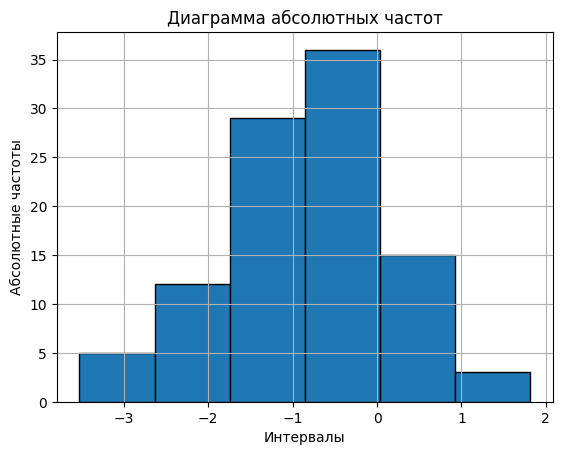

In [42]:
plt.bar(bin_edges[:-1], abs_freq, width=np.diff(bin_edges), edgecolor="black", align="edge")
plt.title('Диаграмма абсолютных частот')
plt.xlabel('Интервалы')
plt.ylabel('Абсолютные частоты')
plt.grid(True)
plt.show()

## 1.2. Интервальный ряд относительных частот


In [43]:
rel_freq = abs_freq / n
sum_rel_freq = np.sum(rel_freq)
print(sum_rel_freq)
print(rel_freq)

1.0
[0.05 0.12 0.29 0.36 0.15 0.03]


### Диаграмма относительных частот


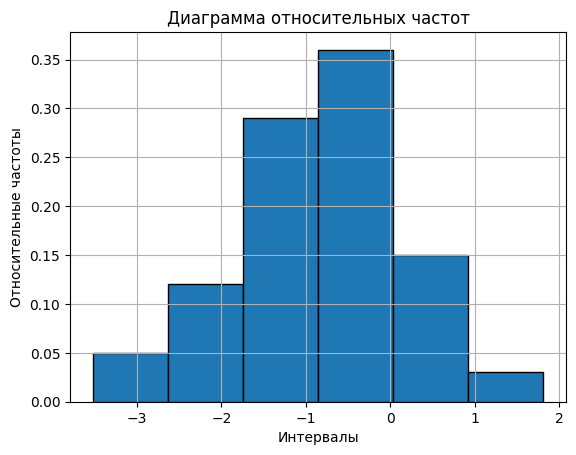

In [44]:
plt.bar(bin_edges[:-1], rel_freq, width=np.diff(bin_edges), edgecolor="black", align="edge")
plt.title('Диаграмма относительных частот')
plt.xlabel('Интервалы')
plt.ylabel('Относительные частоты')
plt.grid(True)
plt.show()

In [45]:
print(f"Сумма абсолютных частот: {sum_abs_freq}")
print(f"Сумма относительных частот: {sum_rel_freq}")

Сумма абсолютных частот: 100
Сумма относительных частот: 1.0


# 2.1 Гистограмма относительных частот и теоретическая кривая распределения


In [46]:
x = np.linspace(np.min(data), np.max(data), 1000)
pdf = norm.pdf(x, a, sigma)     #функция плотности вероятности

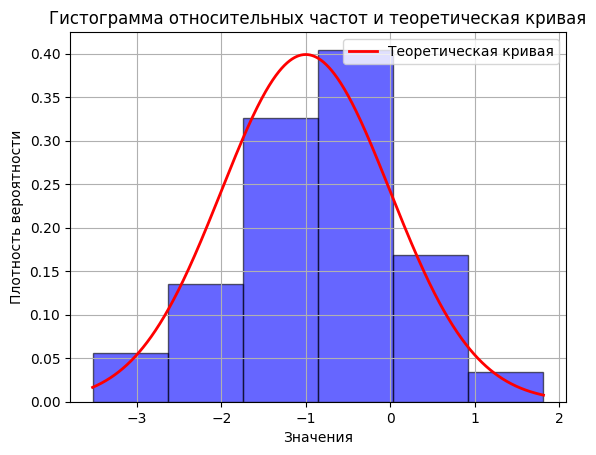

In [47]:
plt.hist(data, bins=bin_edges, density=True, alpha=0.6, color='b', edgecolor='black')
plt.plot(x, pdf, 'r-', lw=2, label='Теоретическая кривая')
plt.title('Гистограмма относительных частот и теоретическая кривая')
plt.xlabel('Значения')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True)
plt.show()

# 2.2 Гистограмма абсолютных частот и график теоретической частоты


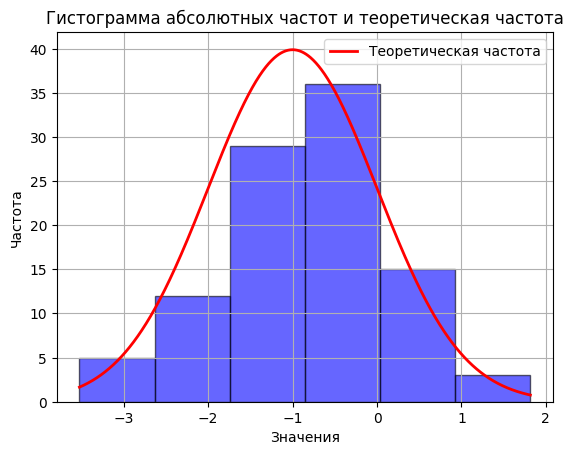

In [48]:
plt.hist(data, bins=num_bins, alpha=0.6, color='b', edgecolor='black')
plt.plot(x, pdf * n * bin_width, 'r-', lw=2, label='Теоретическая частота')
plt.title('Гистограмма абсолютных частот и теоретическая частота')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.legend()
plt.grid(True)
plt.show()

# 2.3 Эмпирическая функция распределения


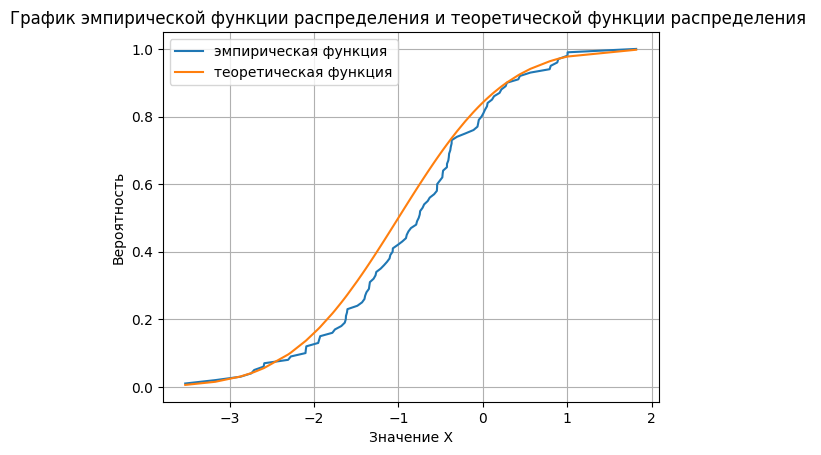

In [49]:
data=np.sort(data)
F_empirical = np.arange(1, n + 1) / n
F_theoretical = 0.5 * (1 + spc.erf((data - a) / (sigma * np.sqrt(2))))
plt.plot(data, F_empirical, label='эмпирическая функция', linestyle='-')
plt.plot(data, F_theoretical, label='теоретическая функция', linestyle='-')
plt.xlabel('Значение X')
plt.ylabel('Вероятность')
plt.title('График эмпирической функции распределения и теоретической функции распределения ')
plt.legend()
plt.grid(True)
plt.show()

# 2.4 Построение бокс-плота


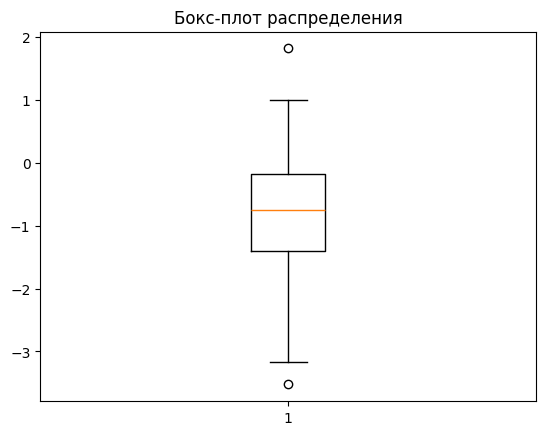

In [50]:
plt.boxplot(data, vert=True)
plt.title("Бокс-плот распределения")
plt.show()

### Статистическая интерпретация

In [51]:
Q1 = np.percentile(data, 25)  
Q2 = np.percentile(data, 50)  
Q3 = np.percentile(data, 75) 
IQR = Q3 - Q1 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data < lower_bound) | (data > upper_bound)]
num_outliers = len(outliers)
print('Количество выбросов:',num_outliers)
expected_outliers_1_percent = n * 0.01
expected_outliers_5_percent = n * 0.05

print(f'теоретически ожидаемое число выбросов : ({expected_outliers_1_percent:.2f}, {expected_outliers_5_percent:.2f})')

Количество выбросов: 2
теоретически ожидаемое число выбросов : (1.00, 5.00)


# Проанализировав результаты п.1 и 2., ответить на следующие вопросы:

### A)	Какова Ваша оценка вероятности попадания значений случайной  величины X в k-ый интервал полученной группировки?

In [52]:
k = 4
def answer_to_question(rel_freq):
    print(f"A) Оценка вероятности попадания значений случайной  величины X в k-ый интервал = {rel_freq[k - 1]:.4f}")
answer_to_question(rel_freq)

A) Оценка вероятности попадания значений случайной  величины X в k-ый интервал = 0.3600


### B) Какой из полученных в п.2 графиков содержит геометрическую интерпретацию этой оценки, покажите ее на графике.

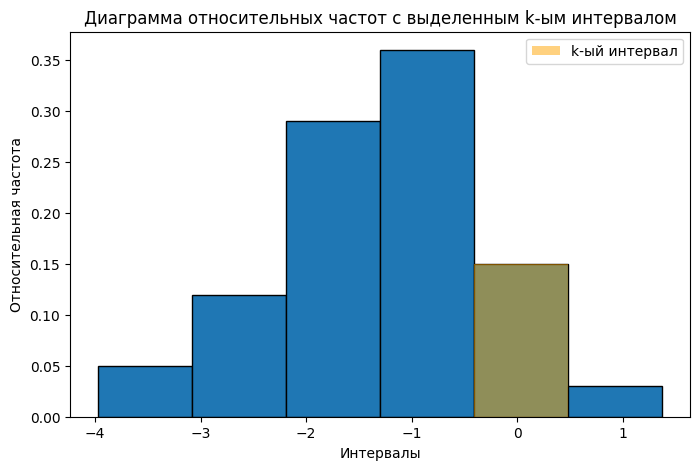

In [53]:
plt.figure(figsize=(8, 5))
plt.bar(bin_edges[:-1], rel_freq, width=np.diff(bin_edges), edgecolor='black')
plt.bar(bin_edges[k], rel_freq[k], width=np.diff(bin_edges)[k], color='orange', alpha=0.5, label='k-ый интервал')
plt.title('Диаграмма относительных частот с выделенным k-ым интервалом')
plt.xlabel('Интервалы')
plt.ylabel('Относительная частота')
plt.legend()
plt.show()


### C)	Какой из полученных в п.2 графиков содержит геометрическую интерпретацию вероятности попадания значений случайной  величины X в k-ый интервал, покажите ее на графике.

- график 2.1

### D) Какова Ваша оценка значения интегральной функции распределения в правой границе k-ого интервала полученной группировки? А чему равно точное значение интегральной функции распределения в правой границе k-ого интервала?

In [54]:
b_k = bin_edges[k]
F_b_k = sts.norm.cdf(b_k, loc=a, scale=sigma)

count = 0
sum_rel = 0
for i in range(len(rel_freq)):
    if count == k:
        break
    sum_rel += rel_freq[i]
    count += 1
    
print("Оценка знач интегр ф.: ", sum_rel)
print(f'Точное значение интегральной функции распределения в правой границе {k}-ого интервала: {F_b_k}')

Оценка знач интегр ф.:  0.82
Точное значение интегральной функции распределения в правой границе 4-ого интервала: 0.8499073427820959


## 3.1 Функция Лапласа для P(|X - MX| < qσ)

Используя таблицу значений функции Лапласа

По таблице Лапласа нашел значение q=1 : 0.3413
P(|X - MX| < qσ)= 2 * 0.3413 = 0.6827

In [55]:
P_theoretical = norm.cdf(a + q * sigma, a, sigma) - norm.cdf(a - q * sigma, a, sigma)
print(f'Вероятность P(|X - {a}| < {q} * {sigma}) = {P_theoretical:.4f}')

Вероятность P(|X - -1| < 1 * 1) = 0.6827


## 3.2 Оценка вероятности по выборке

In [56]:
P_empirical = np.mean(np.abs(data - a) < q * sigma)

In [57]:
print(f"Теоретическая вероятность: {P_theoretical}")
print(f"Оценка вероятности по выборке: {P_empirical}")

Теоретическая вероятность: 0.6826894921370859
Оценка вероятности по выборке: 0.68


# 3.3 Увеличивать объем в 50 раз и делать так 2.2

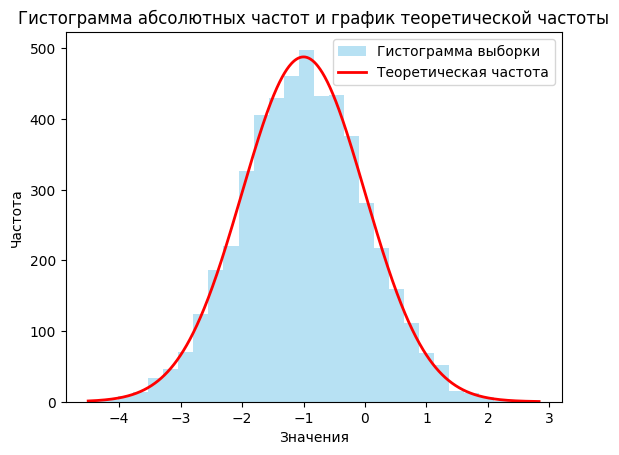

In [58]:
n_large = 100*50   
data_large = np.random.normal(loc=a, scale=sigma, size=n_large)
count, bins, _ = plt.hist(data_large, bins=30, density=False, alpha=0.6, color='skyblue', label='Гистограмма выборки')

bin_width = bins[1] - bins[0]  # Ширина одного интервала (бина)
x = np.linspace(min(data_large), max(data_large), 1000)
pdf = n_large * bin_width * norm.pdf(x, loc=a, scale=sigma)  # Масштабирование плотности на размер выборки и ширину бина

plt.plot(x, pdf, color='red', linewidth=2, label='Теоретическая частота')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Гистограмма абсолютных частот и график теоретической частоты')
plt.legend()
plt.show()


In [59]:
P_theoretical = norm.cdf(q) - norm.cdf(-q)
P_empirical = np.mean(np.abs(data_large - a) < q * sigma)
print(f"Теоретическая вероятность: {P_theoretical}")
print(f"Оценка вероятности по выборке: {P_empirical}")

Теоретическая вероятность: 0.6826894921370859
Оценка вероятности по выборке: 0.6798


# 4. Точечные оценки параметров

### 4.1 первый способ – непосредственное применение формул для вычисления точечных оценок

In [60]:
def cal_mx(data, n):
    sum = 0.0
    for i in data:
        sum += i
    return sum/n

def cal_median(data):
    if n % 2 == 1:
        return data[n//2]
    else:
        mid1 = data[(n+1) // 2]
        mid2 = data[(n - 1) // 2]
        return (mid1 + mid2) / 2
    
def cal_dx(data, mean, n):
    sum = 0.0
    for i in data:
        sum += (i - mean)**2
    return sum/(n-1)

def cal_sigma (dx):
    return math.sqrt(dx)

def cal_skewness(data, mean, dx):
    sum_3 = 0
    for i in data:
        sum_3 += (i - mean)**3
    
    return (sum_3 / n) / (dx ** (3/2))

In [61]:
print("Математического ожидания :", cal_mx(data, n))
print("Медиан", cal_median(data))
print("Дисперсии", cal_dx(data, cal_mx(data, n), n))
print("Стандартного отклонения", cal_sigma(cal_dx(data, cal_mx(data, n), n)))
print("Коэффициент ассиметрии:",cal_skewness(data, cal_mx(data, n), cal_dx(data, cal_mx(data, n), n)))

Математического ожидания : -0.8349542986975698
Медиан -0.7529928462268007
Дисперсии 0.9913244191336267
Стандартного отклонения 0.9956527603203974
Коэффициент ассиметрии: -0.17798237604974787


### 4.2 второй способ – применение встроенных функций Python

In [62]:
mean = np.mean(data)
median = np.median(data)
variance = np.var(data, ddof=1)
std_dev = np.std(data, ddof=1)
skewness = sts.skew(data)

In [63]:
print(f"Оценка мат. ожидания: {mean}")
print(f"Оценка медианы: {median}")
print(f"Оценка дисперсии: {variance}")
print(f"Оценка стандартного отклонения: {std_dev}")
print("Коэффициент ассиметрии:",skewness)

Оценка мат. ожидания: -0.8349542986975698
Оценка медианы: -0.7529928462268007
Оценка дисперсии: 0.9913244191336267
Оценка стандартного отклонения: 0.9956527603203974
Коэффициент ассиметрии: -0.1806858771511939


## 4.3 Увеличение выборки

In [64]:
n_large = 50 * n
data_large = np.random.normal(a, sigma, n_large)
mean_large = np.mean(data_large)
median_large=np.median(data_large)
variance_large = np.var(data_large, ddof=1)  # Дисперсия
std_dev_large = np.sqrt(variance_large)  # Стандартное отклонение
skewness_large = sts.skew(data_large)   # Коэффициент асимметрии

In [65]:
print(f"Оценка мат. ожидания: {mean_large}")
print(f"Оценка медианы: {median_large}")
print(f"Оценка дисперсии: {variance_large}")
print(f"Оценка стандартного отклонения: {std_dev_large}")
print("Коэффициент ассиметрии:",skewness_large)

Оценка мат. ожидания: -0.9664542561360229
Оценка медианы: -0.9555983530258616
Оценка дисперсии: 0.9910626261004973
Оценка стандартного отклонения: 0.9955212835999526
Коэффициент ассиметрии: -0.02326636632713346


# Проанализировав результаты п.4, ответить на следующие вопросы:

## A)	Чему равны коэффициенты асимметрии и эксцесса распределения случайной величины X? 

In [66]:
print("Коэффициент ассиметрии", sts.skew(data))
print("Коэффициенты эксцесса", sts.kurtosis(data))

Коэффициент ассиметрии -0.1806858771511939
Коэффициенты эксцесса 0.05839273558989744


## B)	 Объясните, как увеличение объема выборки повлияло на точность  оценок параметров распределения. 

- увеличение объема выборки способствует более точным и надежным оценкам параметров распределения
- Это явление известно как закон больших чисел

## C)	Какое свойство точечных оценок параметров распределения случайной величины X объясняет такое поведение оценок параметров распределения в ответ на рост объема выборки?

Состоятельность оценок
- Состоятельность: Оценка параметра считается состоятельной, если по мере увеличения объема выборки она стремится к истинному значению этого параметра.